In [34]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = [0.15, -0.45, -1, 0.7, 0.55, -0.65,
        0.56, 0.765, -0.95, 0.15, 0.25, 0.45,
        -0.35, 0.55, 0.95, -0.25, 0.95, 0.85,
        -0.15]



sorted_data1=sorted(data)

data_array = np.array(data)

# Normalize the array between 0 and 1
normalized_data = (data_array - np.min(data_array)) / (np.max(data_array) - np.min(data_array))




media=0.125
desviacion_estandar=0.645
tamaño_muestra=19

datos_normales=st.norm.rvs(loc=media, scale=desviacion_estandar, size=tamaño_muestra)


kstest_result = st.kstest(normalized_data, 'norm', args=(media, desviacion_estandar))
print("Estadístico de prueba KS:", kstest_result.statistic)
print("P-valor:", kstest_result.pvalue)


#Son diferentes o no sigen una distribucion normal

alpha = 0.05
print("\nResultado de la prueba:")
if kstest_result.pvalue < alpha:
    print("Se rechaza la hipótesis nula. Los datos no siguen la distribución normal propuesta.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. Los datos podrían seguir la distribución normal propuesta.")




Estadístico de prueba KS: 0.438292487046084
P-valor: 0.0007710188583950339

Resultado de la prueba:
Se rechaza la hipótesis nula. Los datos no siguen la distribución normal propuesta.


## Punto 7

In [35]:
import numpy as np

# Función acumulada proporcionada
def funcion_acumulada(x):
    if 0 <= x <= 1:
        return (9/15)*x - 0.065
    else:
        return 0

# Datos dados
data2 = [0.16, 0.565, 0.76, 0.7, 0.55, 0.54,
         0.56, 0.765, 0.88, 0.15, 0.25, 0.45,
         0.12, 0.55, 0.95, 0.67, 0.95, 0.85,
         0.15]

# 1. Ordenar los datos de menor a mayor
sorted_data = np.sort(data2)

# 2. Calcular la función acumulada empírica (Fn) de los datos ordenados
Fn = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# 3. Calcular la función acumulada teórica (F) de la función_acumulada proporcionada
F = np.array([funcion_acumulada(x) for x in sorted_data1])
F=np.arange(1, len(sorted_data1) + 1) / len(sorted_data1)

# 4. Calcular la diferencia absoluta entre las funciones acumuladas empírica y teórica
diferencia_absoluta = np.abs(Fn - F)

# 5. Encontrar el máximo valor de la diferencia absoluta
D = np.max(diferencia_absoluta)

# 6. Calcular el estadístico de prueba
Dn = np.sqrt(len(sorted_data)) * D

# 7. Comparar con el valor crítico
valor_critico = 0.371  # Valor crítico para un nivel de significancia del 10%

# 8. Tomar la decisión
nivel_significancia = 0.1
if Dn > valor_critico:
    print(f"Se rechaza la hipótesis nula. Dn = {Dn} > D_alpha = {valor_critico}")
else:
    print(f"No hay suficiente evidencia para rechazar la hipótesis nula. Dn = {Dn} <= D_alpha = {valor_critico}")


print(F)
print(Fn)

No hay suficiente evidencia para rechazar la hipótesis nula. Dn = 0.0 <= D_alpha = 0.371
[0.05263158 0.10526316 0.15789474 0.21052632 0.26315789 0.31578947
 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737 0.63157895
 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684 0.94736842
 1.        ]
[0.05263158 0.10526316 0.15789474 0.21052632 0.26315789 0.31578947
 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737 0.63157895
 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684 0.94736842
 1.        ]


In [29]:
F = np.array([funcion_acumulada(x) for x in data])



## Preparcial Librerias Utiles (Prueba de Kolmovorog)

In [74]:
from scipy.stats import kstest, norm

# Supongamos que tenemos los siguientes datos.
data = [-1, -0.45, -0.15, 0.55, 0.7]

# Realizamos la prueba de Kolmogorov-Smirnov
resultado_prueba = kstest(data, norm(loc=0, scale=1).cdf)

# Imprimimos los resultados
print(f"Estadístico de prueba: {resultado_prueba.statistic}")
print(f"Valor p: {resultado_prueba.pvalue}")

# Interpretación de los resultados
nivel_significancia = 0.05
if resultado_prueba.pvalue < nivel_significancia:
    print("Rechazar H0: Los datos no siguen una distribución normal con media 0 y desviación estándar 1")
else:
    print("No se puede rechazar H0: Los datos siguen una distribución normal con media 0 y desviación estándar 1")


#Tenemos las muestras de las siguientes datos
numbers = [1.50, 1.60, 1.11, 2.85, 2.99, 1.43,
           1.78, 1.20, 1.20, 1.15, 1.05, 2.50,
           1.60, 1.50, 1.20, 1.33, 1.56, 1.70,
           2.98, 2.05, 1.50, 1.70]


#Queremos ver si siguien una distribución uniforme en el intervalo [1, 3]


#1. Queremos hacer una prueba chi cuadrado con k = 5 intervalos
k = 4
#2. Calculamos la frecuencia esperada de cada intervalo
frecuencia_esperada = len(numbers) / k






Estadístico de prueba: 0.24196365222307303
Valor p: 0.8685888274629627
No se puede rechazar H0: Los datos siguen una distribución normal con media 0 y desviación estándar 1


In [75]:
#count the number of frecuencies in the 4 intervals
import numpy as np
frecuencias, intervalos = np.histogram(numbers, bins=k)

#do the chi square test
from scipy.stats import chisquare
chisquare(frecuencias, frecuencia_esperada)

#The p-value is 0.0309, which is less than the significance level of 0.05. Therefore, we reject the null hypothesis and conclude that the data do not follow a uniform distribution in the interval [1, 3].


Power_divergenceResult(statistic=8.90909090909091, pvalue=0.030524311925166546)

In [137]:
from scipy.stats import expon, chisquare
import numpy as np
import matplotlib.pyplot as plt

# Your data
X = [120, 350, 240, 130, 60, 180, 120, 112, 245, 600, 320, 520, 54, 45, 15, 90, 125, 110, 250]


#normalize the data
X_array = np.array(X)
X_array=np.sort(X_array)
X_standardized = (X_array - np.min(X_array)) / (np.max(X_array) - np.min(X_array))


# Fit an exponential distribution to the data
loc, scale = expon.fit(X_standardized)
print(f"loc = {loc}, scale = {scale}")

k = 4
# Generate expected frequencies based on the exponential distribution
expected_frequencies = expon.pdf(X_standardized, loc=loc, scale=scale) 
print(expected_frequencies)
print(X_standardized)
expected_frequencies= np.histogram(expected_frequencies, bins=k)

#Divide the data into 5 intervals
X_frecuencias, X_intervalos = np.histogram(X_standardized, bins=k)

print(X_frecuencias)
print(expected_frequencies[0])

# Perform the chi-square test
chisquare(X_frecuencias, expected_frequencies[0])



loc = 0.0, scale = 0.30598290598290595
[3.26815642 2.76386006 2.62833074 2.54169046 2.1494922  1.92225655
 1.90089837 1.81781251 1.81781251 1.76773824 1.71904334 1.30009629
 0.92982657 0.90421315 0.8793053  0.59470811 0.50294104 0.19456227
 0.12444015]
[0.         0.05128205 0.06666667 0.07692308 0.12820513 0.16239316
 0.16581197 0.17948718 0.17948718 0.18803419 0.1965812  0.28205128
 0.38461538 0.39316239 0.4017094  0.52136752 0.57264957 0.86324786
 1.        ]
[11  4  2  2]
[6 2 7 4]


Power_divergenceResult(statistic=10.738095238095239, pvalue=0.013229765523382665)

## Simulación de Monte Carlo

El tiempo promedio de llegada es 50.06821888829596 minutos
La desviación estándar de los tiempos de llegada es 15.268257290041365 minutos
Skewness: 1.5178111908574963
Kurtosis: 5.079497702060989


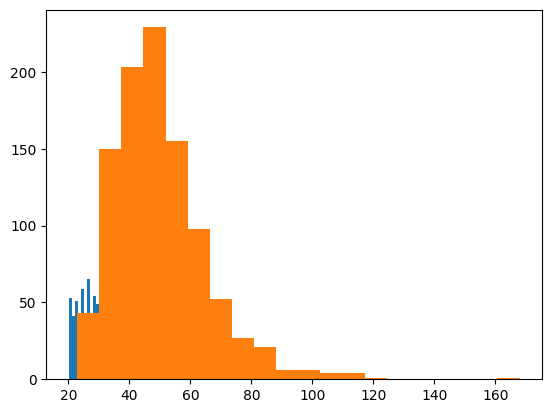

In [161]:
media_exponecial=15
import random

#create a unifmrom distribution between 20 and 40
from scipy.stats import uniform
uniform_distribution = uniform(loc=20, scale=20)

#generate 1000 random numbers
random_numbers = uniform_distribution.rvs(size=1000)

plt.hist(random_numbers, bins=20)

#create a exponential distribution with mean of 15
from scipy.stats import expon
t_p = expon(scale=media_exponecial)


def tiempo_adicional_trafico():
    probabilidad = random.uniform(0, 1)
    if probabilidad < 0.1:
        return 0
    elif probabilidad < 0.7:
        return 5
    else:
        return 10

def tiempo_total_llegada():
    tiempo_preparacion=expon(scale=15).rvs()
    tiempo_viaje=random.uniform(20, 40)
    tiempo_trafico=tiempo_adicional_trafico()

    tiempo_total=tiempo_preparacion+tiempo_viaje+tiempo_trafico
    return tiempo_total

num_simulaciones = 1000

tiempos_totales=[]

for i in range(num_simulaciones):
    tiempos_totales.append(tiempo_total_llegada())


promedio_tiempos_totales = np.mean(tiempos_totales)
print(f"El tiempo promedio de llegada es {promedio_tiempos_totales} minutos")

desviacion_estandard_tiempos_totales = np.std(tiempos_totales)
print(f"La desviación estándar de los tiempos de llegada es {desviacion_estandard_tiempos_totales} minutos")



#do a sensibility analysis

#plot the histogram of the data
plt.hist(tiempos_totales, bins=20)
#calculate the skewness and kurtosis
from scipy.stats import skew, kurtosis
print(f"Skewness: {skew(tiempos_totales)}")
print(f"Kurtosis: {kurtosis(tiempos_totales)}")
# and asimetry and curtosis

#vemos que tiene asimetria positiva esto es que los datos estan 



In [ ]:
dfit = distfit(todf=True)
dfit.fit_transform(df['TiempoEntreArribos'])
dfit.plot()
dfit.plot_summary()
plt.axhline(y = 0.05, color = 'r', linestyle = '-')
plt.show()